In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
!pip install dmba
from dmba import regressionSummary
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier, DMatrix, cv
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
df_16_50_1=pd.read_csv('/content/drive/MyDrive/Daten ML/Synthdtik Patient/Threshold_16_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_50 (1).csv', keep_default_na=True)

df_16_50_1.columns = [s.strip().replace(' ', '_') for s in df_16_50_1.columns]

df_16_50_1=df_16_50_1.dropna(axis=1)

df_16_50_2=pd.read_csv('/content/drive/MyDrive/Daten ML/Synthdtik Patient/Threshold_16_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_50_v2.csv', keep_default_na=True)

df_16_50_2.columns = [s.strip().replace(' ', '_') for s in df_16_50_2.columns]

df_16_50_2=df_16_50_2.dropna(axis=1)

df_8_50_1=pd.read_csv('/content/drive/MyDrive/Daten ML/Synthdtik Patient/Threshold_8_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_50.csv', keep_default_na=True)

df_8_50_1.columns = [s.strip().replace(' ', '_') for s in df_8_50_1.columns]

df_8_50_1=df_8_50_1.dropna(axis=1)

df_8_50_2=pd.read_csv('/content/drive/MyDrive/Daten ML/Synthdtik Patient/Threshold_8_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_50_v2.csv', keep_default_na=True)

df_8_50_2.columns = [s.strip().replace(' ', '_') for s in df_8_50_2.columns]

df_8_50_2=df_8_50_2.dropna(axis=1)

Baseline Model with Dataset 8_50_1

In [18]:
feature_columns = [col for col in df_8_50_1.columns if 'FEATURE' in col]
X = df_8_50_1[feature_columns]
print(X)
Y=df_8_50_1['Depression']
print(Y)

#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)

      FEATURE_0  FEATURE_1  FEATURE_2  FEATURE_3  FEATURE_4  FEATURE_5  \
0      2.636042  -0.443682  -0.443897  -0.443899  -0.333370  -0.443870   
1      4.247861  -0.452998  -0.453124  -0.453191  -0.436989  -0.453182   
2      4.791958  -0.421814  -0.422065  -0.422069  -0.414298  -0.422062   
3      4.846170  -0.416106  -0.416285  -0.416340  -0.414271  -0.416337   
4      2.332857  -0.465694  -0.465875  -0.465883  -0.363099  -0.465858   
...         ...        ...        ...        ...        ...        ...   
8102   5.566882  -0.412412  -0.412544  -0.412571  -0.407010  -0.412568   
8103   4.080742  -0.436547  -0.436871  -0.436875  -0.284114  -0.436833   
8104   3.272749  -0.446779  -0.447035  -0.447094  -0.283515  -0.447047   
8105   5.799608  -0.406560  -0.406702  -0.406723  -0.397442  -0.406728   
8106   5.238515  -0.424872  -0.425026  -0.425065  -0.405070  -0.425073   

      FEATURE_6  FEATURE_7  FEATURE_8  FEATURE_9  ...  FEATURE_46  FEATURE_47  \
0     -0.443870  -0.443899  -0

1.0


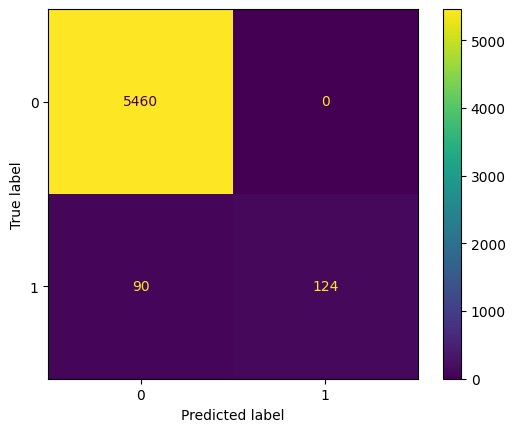

In [ ]:
crossvalidation = KFold(n_splits=20, shuffle=True, random_state=1)
#Baseline Model
XGB = XGBClassifier(n_estimators=250, learning_rate=0.01, max_depth=5, random_state=42)
XGB.fit(train_X, train_Y)

#Classification

pred_Y = XGB.predict(train_X)
Presicion_score=precision_score(train_Y, pred_Y)
print(Presicion_score)
confusion_matrix(train_Y, pred_Y)

ConfusionMatrixDisplay(confusion_matrix(train_Y, pred_Y)).plot()

Hyperparemter Tuning Dataset 1: 8_50_1

Accuracy: 0.9782161939991779
Precision: 1.0
Recall: 0.45918367346938777
F1 Score: 0.6293706293706294
AUC-Wert: 0.9557793995542543


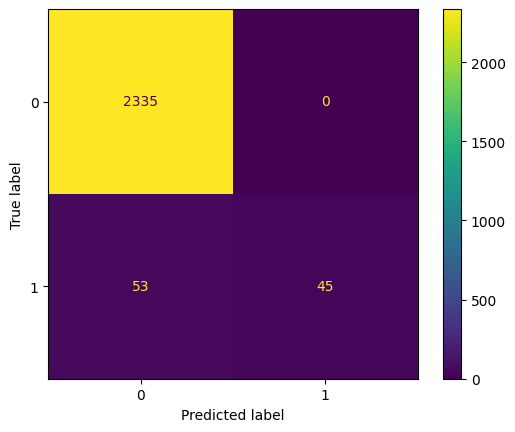

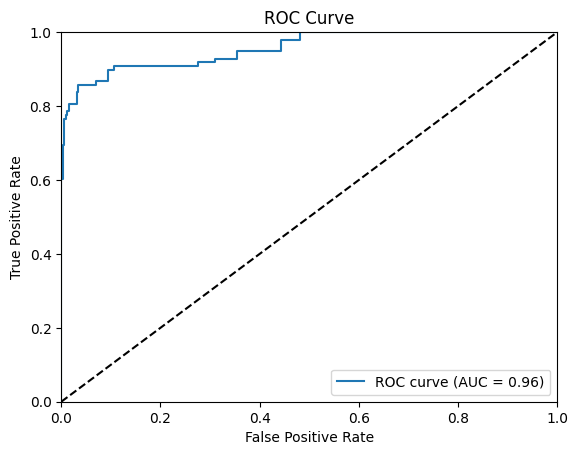

In [ ]:
XGB2=XGBClassifier()

param_dist = {
    'n_estimators': [50, 100, 150, 250, 500, 1000],
    'max_depth': [5, 10, 15, 7],
    'learning_rate': [0.001, 0.01, 0.1, 0.02, 0.03, 0.05],
    'subsample': [0.6, 0.7,0.8],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10],
    'min_child_weight': [1, 2, 3, 5, 10, 20]
    }

rand_search = RandomizedSearchCV(XGB2,
                                 param_distributions = param_dist,
                                 n_iter=3,
                                 cv=crossvalidation,
                                 scoring='roc_auc')

#hptun =rand_search.fit(train_X, train_Y)
#best_parm=hptun.best_params_
#best_score=hptun.best_score_
#print(best_parm)
#print(best_score)

# XGBClassifier definieren und trainieren
XBG2 = XGBClassifier(subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.01, gamma=0.1)
XBG2.fit(train_X, train_Y)

# Vorhersagen treffen
pred_Y = XBG2.predict(test_X)

# Verwirrungsmatrix berechnen und anzeigen
cm = confusion_matrix(test_Y, pred_Y)
ConfusionMatrixDisplay(cm).plot()

# Metriken berechnen
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)  # True positive rate
FNR = FN / (TP + FN)  # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

# Metriken ausgeben
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

#AUC

y_pred_proba = XBG2.predict_proba(test_X)[:, 1]

# AUC-Wert berechnen
auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")

# ROC-Kurve berechnen
fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# ROC-Kurve zeichnen
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Dataset 2: 8_50_2


{'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 2, 'max_depth': 15, 'learning_rate': 0.001, 'gamma': 1}
0.9913805255212988
Accuracy: 0.8852813852813853
Precision: 0.9746835443037974
Recall: 0.6015625
F1 Score: 0.7439613526570048
AUC-Wert: 0.9912928050149701


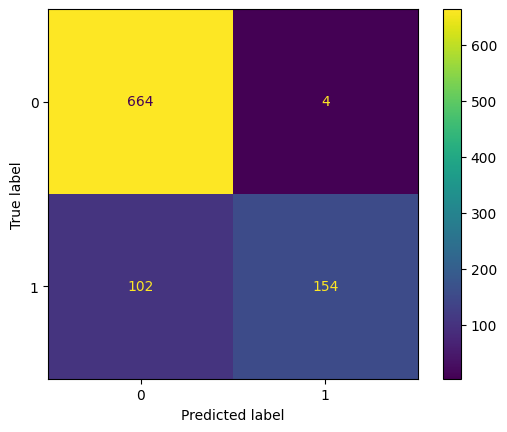

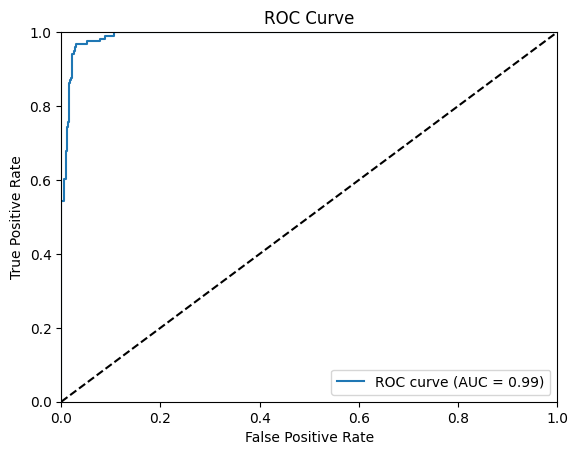

In [ ]:
feature_columns = [col for col in df_8_50_2.columns if 'FEATURE' in col]
X = df_8_50_2[feature_columns]
Y=df_8_50_2['Depression']

#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)

XGB2=XGBClassifier()

param_dist = {
    'n_estimators': [50, 100, 150, 250, 500, 1000],
    'max_depth': [5, 10, 15, 7],
    'learning_rate': [0.001, 0.01, 0.1, 0.02, 0.03, 0.05],
    'subsample': [0.6, 0.7,0.8],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10],
    'min_child_weight': [1, 2, 3, 5, 10, 20]
    }

rand_search = RandomizedSearchCV(XGB2,
                                 param_distributions = param_dist,
                                 n_iter=3,
                                 cv=crossvalidation,
                                 scoring='roc_auc')

hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(best_parm)
print(best_score)

# XGBClassifier definieren und trainieren
XBG2 = XGBClassifier(**best_parm)
XBG2.fit(train_X, train_Y)

# Vorhersagen treffen
pred_Y = XBG2.predict(test_X)

# Verwirrungsmatrix berechnen und anzeigen
cm = confusion_matrix(test_Y, pred_Y)
ConfusionMatrixDisplay(cm).plot()

# Metriken berechnen
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)  # True positive rate
FNR = FN / (TP + FN)  # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

# Metriken ausgeben
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

#AUC

y_pred_proba = XBG2.predict_proba(test_X)[:, 1]

# AUC-Wert berechnen
auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")

# ROC-Kurve berechnen
fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# ROC-Kurve zeichnen
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Dataset 3: 16_50_1

{'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 2, 'max_depth': 7, 'learning_rate': 0.03, 'gamma': 0.5}
0.9998076722250084
Accuracy: 0.9991466363248471
Precision: 0.9989572471324296
Recall: 0.9948078920041536
F1 Score: 0.9968782518210196
AUC-Wert: 0.9999905878068631


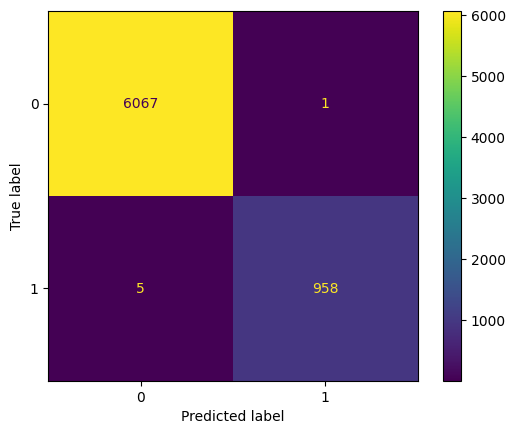

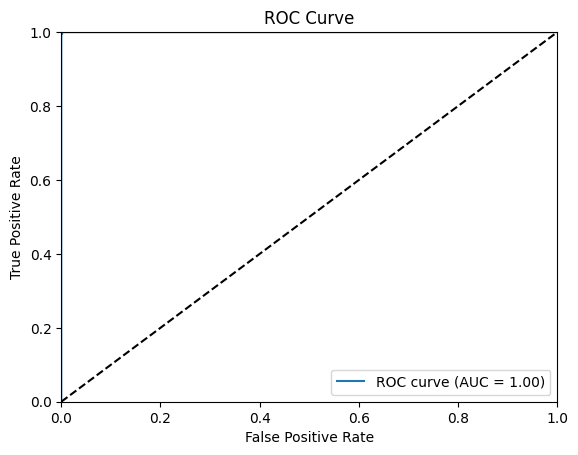

In [ ]:
feature_columns = [col for col in df_16_50_1.columns if 'FEATURE' in col]
X = df_16_50_1[feature_columns]
Y=df_16_50_1['Depression']

#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)

XGB2=XGBClassifier()

param_dist = {
    'n_estimators': [50, 100, 150, 250, 500, 1000],
    'max_depth': [5, 10, 15, 7],
    'learning_rate': [0.001, 0.01, 0.1, 0.02, 0.03, 0.05],
    'subsample': [0.6, 0.7,0.8],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10],
    'min_child_weight': [1, 2, 3, 5, 10, 20]
    }

rand_search = RandomizedSearchCV(XGB2,
                                 param_distributions = param_dist,
                                 n_iter=3,
                                 cv=crossvalidation,
                                 scoring='roc_auc')

hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(best_parm)
print(best_score)

# XGBClassifier definieren und trainieren
XBG2 = XGBClassifier(**best_parm)
XBG2.fit(train_X, train_Y)

# Vorhersagen treffen
pred_Y = XBG2.predict(test_X)

# Verwirrungsmatrix berechnen und anzeigen
cm = confusion_matrix(test_Y, pred_Y)
ConfusionMatrixDisplay(cm).plot()

# Metriken berechnen
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)  # True positive rate
FNR = FN / (TP + FN)  # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

# Metriken ausgeben
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

#AUC

y_pred_proba = XBG2.predict_proba(test_X)[:, 1]

# AUC-Wert berechnen
auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")

# ROC-Kurve berechnen
fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# ROC-Kurve zeichnen
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

{'subsample': 0.7, 'n_estimators': 250, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.5}
1.0
Accuracy: 0.9984868136619109
Precision: 0.9960068454078722
Recall: 1.0
F1 Score: 0.9979994284081166
AUC-Wert: 1.0


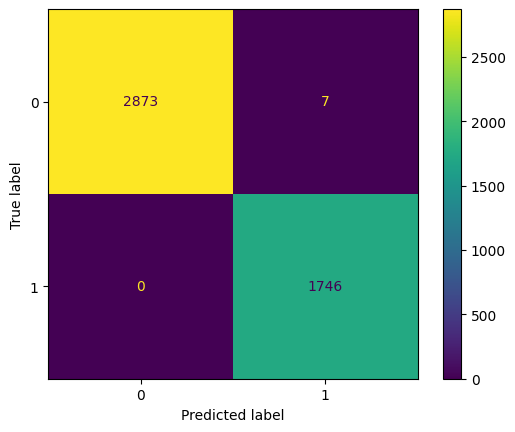

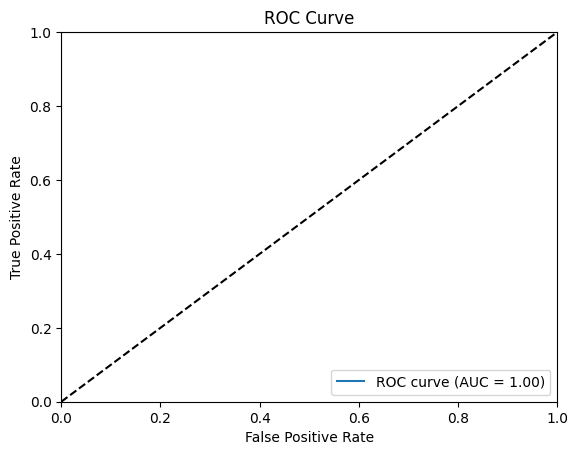

In [17]:
feature_columns = [col for col in df_16_50_2.columns if 'FEATURE' in col]
X = df_16_50_2[feature_columns]
Y=df_16_50_2['Depression']

#Training Test Split with 70/30 Ratio
train_X, test_X, train_Y, test_Y=train_test_split(X, Y, test_size=0.3, random_state=42)

XGB2=XGBClassifier()

param_dist = {
    'n_estimators': [50, 100, 150, 250, 500, 1000],
    'max_depth': [5, 10, 15, 7],
    'learning_rate': [0.001, 0.01, 0.1, 0.02, 0.03, 0.05],
    'subsample': [0.6, 0.7,0.8],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10],
    'min_child_weight': [1, 2, 3, 5, 10, 20]
    }

rand_search = RandomizedSearchCV(XGB2,
                                 param_distributions = param_dist,
                                 n_iter=3,
                                 cv=crossvalidation,
                                 scoring='roc_auc')

hptun =rand_search.fit(train_X, train_Y)
best_parm=hptun.best_params_
best_score=hptun.best_score_
print(best_parm)
print(best_score)

# XGBClassifier definieren und trainieren
XBG2 = XGBClassifier(**best_parm)
XBG2.fit(train_X, train_Y)

# Vorhersagen treffen
pred_Y = XBG2.predict(test_X)

# Verwirrungsmatrix berechnen und anzeigen
cm = confusion_matrix(test_Y, pred_Y)
ConfusionMatrixDisplay(cm).plot()

# Metriken berechnen
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)  # True positive rate
FNR = FN / (TP + FN)  # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

# Metriken ausgeben
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

#AUC

y_pred_proba = XBG2.predict_proba(test_X)[:, 1]

# AUC-Wert berechnen
auc_value = roc_auc_score(test_Y, y_pred_proba)
print(f"AUC-Wert: {auc_value}")

# ROC-Kurve berechnen
fpr, tpr, thresholds = roc_curve(test_Y, y_pred_proba)

# ROC-Kurve zeichnen
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale Linie
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()